Features Informations :
    
    Sales : Unit sales (in thousands) at each location
    
    CompPrice : Price charged by competitor at each location

    Income : Community income level (in thousands of dollars)

    Advertising : Local advertising budget for company at each location (in thousands of dollars)

    Population : Population size in region (in thousands)

    Price : Price company charges for car seats at each site

    ShelveLoc : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

    Age : Average age of the local population

    Education : Education level at each location

    Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location

    US : A factor with levels No and Yes to indicate whether the store is in the US or not

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Carseats.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


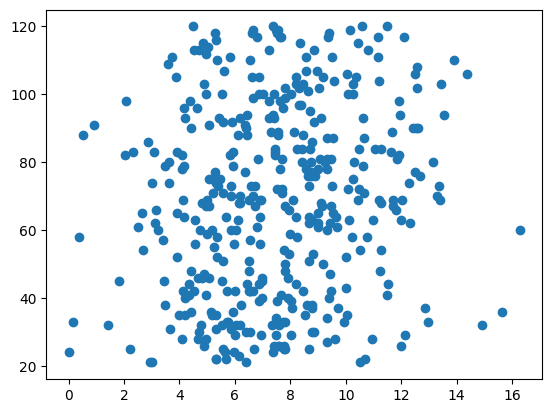

In [5]:
plt.scatter(df['Sales'],df['Income'])

In [6]:
from pandas_visual_analysis import VisualAnalysis

In [7]:
VisualAnalysis(df)

In [8]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## Feature Engineering

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
df.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [11]:
dict = { 'Bad' : 0 , 'Good' :1,'Medium' :2}

df['ShelveLoc'] = df['ShelveLoc'].map(dict)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No


In [12]:
df.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
dict = { 'Yes' : 0 , 'No' :1}

df['Urban'] = df['Urban'].map(dict)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,0,Yes
1,11.22,111,48,16,260,83,1,65,10,0,Yes
2,10.06,113,35,10,269,80,2,59,12,0,Yes
3,7.40,117,100,4,466,97,2,55,14,0,Yes
4,4.15,141,64,3,340,128,0,38,13,0,No


In [14]:
df.US.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
dict = { 'Yes' : 0 , 'No' :1}

df['US'] = df['US'].map(dict)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,0,0
1,11.22,111,48,16,260,83,1,65,10,0,0
2,10.06,113,35,10,269,80,2,59,12,0,0
3,7.40,117,100,4,466,97,2,55,14,0,0
4,4.15,141,64,3,340,128,0,38,13,0,1


## Spliting data

In [16]:
x = df.drop(['US'],axis=1)
y= df['US']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [19]:
x_train.shape

(320, 10)

In [20]:
y_train.shape

(320,)

In [21]:
x_test.shape

(80, 10)

In [22]:
y_test.shape

(80,)

## Decision Tree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

criterion{“gini”, “entropy”, “log_loss”}, default=”gini” : 
        splitter{“best”, “random”}, default=”best” : The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth, default=None : 
        The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split, default=2 : 
        The minimum number of samples required to split an internal node, If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

min_samples_leafint or float, default=1 : 
        The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

min_weight_fraction_leaf, default=0.0 : 
        The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_features int, float or {“auto”, “sqrt”, “log2”}, default=None : 
        The number of features to consider when looking for the best split , If int, then consider max_features features at each split, If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split , If “auto”, then max_features=sqrt(n_features), If “sqrt”, then max_features=sqrt(n_features), If “log2”, then max_features=log2(n_features), If None, then max_features=n_features.
        Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

random_state int, RandomState instance or None, default=None : 
        Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. See Glossary for details.

max_leaf_nodes int, default=None : 
        Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decrease float, default=0.0 : 
        A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

class_weight dict, list of dict or “balanced”, default=None : 
        Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

        Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

        The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

        For multi-output, the weights of each column of y will be multiplied.

        Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

ccp_alpha non-negative float, default=0.0 : 
        Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details. https://www.youtube.com/watch?v=DSL318pDTAY

In [24]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(accuracy_score(pred,y_test))

0.7875


In [25]:
dtree = DecisionTreeClassifier(ccp_alpha = 2)
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(accuracy_score(pred,y_test))

0.6875


In [26]:
dtree = DecisionTreeClassifier(ccp_alpha = 0.1)
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(accuracy_score(pred,y_test))

0.925


In [28]:
print(dtree.classes_)
print(dtree.max_features_)
print(dtree.n_classes_)
print(dtree.n_features_in_)
print(dtree.n_outputs_)
print(dtree.tree_)

[0 1]
10
2
10
1


## Applying Decision Tree using GridSearchCV

**parameters**

In [ ]:
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best','random'] ,
    'max_depth' : [3,7,10,13,15,17],
    'max_features' : ['auto','log2',None],
    'ccp_alpha' :[0.00001,0.0001,0.001,0.01,0.1,1,2,3,4,5]
}

In [ ]:
dtree = DecisionTreeClassifier()
gs_dtree = GridSearchCV(dtree , params , verbose =3,scoring = 'accuracy',cv=5)

In [ ]:
gs_dtree.fit(x_train , y_train)

**Attributes**

In [ ]:
print(gs_dtree.best_params_)

In [ ]:
print(gs_dtree.best_score_)

In [ ]:
print(gs_dtree.classes_)

In [ ]:
# can be applied for decision tree model , here it is gridsearchcv object
# print(gs_dtree.max_features_)
# print(gs_dtree.n_classes_)
# print(gs_dtree.n_features_in_)
# print(gs_dtree.n_feature_names_in)
# print(gs_dtree.n_outputs_)
# print(gs_dtree.tree_)